# Introducción a Jupyter Notebook, Pandas, Matplotlib, etc.

En esta hoja introduciremos la forma de trabajar con Jupyter Notebook, instalado a través de la imagen docker `jupyter/scipy-notebook`. Veremos cómo los distintos elementos de las librerías de Python interactúan con el notebook para mostrar imágenes, gráficos, etc. También, en las siguientes sesiones los usaremos para acceder a conexiones SQL y a bases de datos NoSQL.

Enlaces a otros tutoriales introductorios (que también se centran en tratamiento de datos para Big Data): [1](https://github.com/CharlestonDataScience/PythonNotebooks/blob/master/notebooks/tutorial_01/pandas_tutorial.ipynb) y [2](https://github.com/phelps-sg/python-bigdata/blob/master/src/main/ipynb/pandas.ipynb), entre otros muchos.

##  Pequeña introducción a Docker, Docker-Compose y Jupyter Notebook

_Docker_ es un gestor de contenedores. Permite instalar paquetes pre-instalados de las utilidades que vamos a usar en este curso. En las máquinas del laboratorio está instalado el paquete _Docker_ de Jupyter Notebook que usaremos. Para listar los contenedores _docker_ disponibles en una máquina podemos ejecutar `docker images`:

    $ docker images
    REPOSITORY                     TAG                 IMAGE ID            CREATED             SIZE
    jupyter/scipy-notebook         latest              fd9cad0aeeeb        2 months ago        6.57GB
    neo4j                          latest              9481a852963b        2 months ago        173MB
    mongo                          latest              57c67caab3d8        2 months ago        359MB

_Docker_ ofrece también `docker-compose`, una utilidad que permite conectar entre sí varios contenedores ofreciendo servicios. `docker-compose` también descargará automáticamente los contenedores necesarios. En cada directorio de cada sesión de prácticas existirá un fichero `docker-compose.yml`, que incluye la configuración para ejecutar el _Notebook_ y los otros contenedores necesarios (por ejemplo otras bases de datos).

Para las prácticas vamos a usar la imagen `jupyter/scipy-notebook`. La información de cómo usar este contenedor se puede obtener [aquí](https://hub.docker.com/r/jupyter/scipy-notebook/).

### Instalación de Docker en Windows

Si se quiere utilizar Docker desde Windows, se puede hacer igualmente. Existen unas instrucciones para usar [Docker en Windows](https://docs.docker.com/docker-for-windows/). Una vez instalado, habría que instalar la imagen que usaremos con la misma orden `docker pull jupyter/scipy-notebook`.


### Descarga del código de prácticas

Existen varias formas de traer el código de prácticas al contenedor. La más sencilla es ejecutar el siguiente código:
    
    $ git clone https://github.com/dsevilla/bdge.git
    
Esto creará el directorio `bdge` con todo el código de las prácticas. Dentro de cada subdirectorio (por ejemplo en este caso `intro`), habrá un fichero `docker-compose.yml`, que sirve para ejecutar y conectar los contenedores necesarios para cada parte de la práctica. Así pues:

    $ git clone https://github.com/dsevilla/bdge.git
    $ cd bdge/intro
    $ docker-compose up
    Creating network "intro_default" with the default driver
    Creating intro_notebook_1 ... done
    Attaching to intro_notebook_1
    notebook_1  | Execute the command
    notebook_1  | [I 10:32:05.350 NotebookApp] Writing notebook server cookie secret to ...
    notebook_1  | [I 10:32:05.578 NotebookApp] Serving notebooks from local directory: /home/jovyan
    notebook_1  | [I 10:32:05.578 NotebookApp] 0 active kernels 
    notebook_1  | [I 10:32:05.578 NotebookApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).
    notebook_1  |     to login:
    notebook_1  |         http://localhost:8888/

Accediendo a la IP http://localhost:8888/ ó http://127.0.0.1:8888/ se accede al _Notebook_, y el directorio actual (`intro`) aparece disponible en la lista de directorios.

**Se aconseja guardar el Notebook con otro nombre (File->Rename...) para evitar problemas con las actualizaciones posteriores del repositorio con `git`.**

Para parar el contenedor, se puede ejecutar:

    $ docker-compose stop
    $ docker-compose rm

(Si no se realiza el `rm`, `docker-compose up` volverá a lanzar el contenedor anteriormente parado).

### Ejecución del Jupyter Notebook de forma aislada

El Notebook también se puede ejecutar independientemente. Para ejecutar una sesión de Jupyter Notebook hay que escribir:

    $ docker run -it --rm -p 8888:8888 jupyter/scipy-notebook
    [I 23:39:02.615 NotebookApp] Writing notebook server cookie secret to ...
    [W 23:39:02.712 NotebookApp] WARNING: The notebook server is listening ...
    [I 23:39:02.877 NotebookApp] Use Control-C to stop this server and shut down all kernels ...
    
    Copy/paste this URL into your browser when you connect for the first time,
    to login with a token:
        http://localhost:8888/?token=<TOKEN>


## Jupyter Notebook

Los *Notebooks* contienen una mezcla de texto y código, y se pueden ir ejecutando paso a paso. Al pulsar Ctrl+Intro en una celda, se ejecuta el código de la celda y se muestra el la siguiente celda. Al pulsar Shift+Intro se ejecuta la celda actual y pasa automáticamente a la siguiente.

Existen también "magics", que sirven para obtener información de la hoja, o ejecutar comandos especiales. Por ejemplo, órdenes de shell, como en la siguiente celda. Hay varios tutoriales Online. Por ejemplo: [Tutorial](https://github.com/esc/scipy2013-tutorial-numpy-ipython/blob/master/ipython.ipynb).

In [1]:
!uname -a

Linux 0b561bd0bb1b 4.9.93-linuxkit-aufs #1 SMP Wed Jun 6 16:55:56 UTC 2018 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python

A continuación mostramos los paquetes que usaremos regularmente para tratar datos, `pandas`, `numpy`, `matplotlib`.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

Lo siguiente hace que los gráficos se muestren inline. Para figuras pequeñas se puede utilizar unas figuras interactivas que permiten zoom, usando `%maplotlib nbagg`.

In [4]:
%matplotlib inline
matplotlib.style.use('ggplot')

## Numpy

Numpy es una de las librerías más utilizadas en Python, y ofrece un interfaz sencillo para operaciones eficientes con números, _arrays_ y matrices. Numpy se utilizará de apoyo muchas veces que haya que hacer procesamiento local de datos recogidos de una base de datos, o como preparación para la graficación de datos. En la celda siguiente se muestra un vídeo introductorio, y también se puede acceder a tutoriales online: [Tutorial](https://github.com/esc/scipy2013-tutorial-numpy-ipython/blob/master/operations.ipynb).

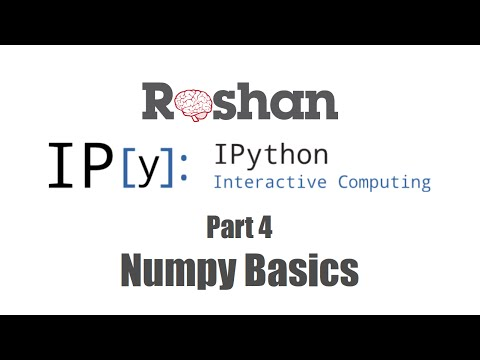

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('o8fmjaW9a0A') # Yes, it can also embed youtube videos.

Numpy permite generar y procesar arrays de datos de forma muy eficiente. A continuación se muestran algunos ejemplos:

In [8]:
a = np.array([3,4,5,6])
print(a.shape)
print(a[0])
a[0] = 9
print (a)

(4,)
3
[9 4 5 6]


In [9]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(1,20)

También arrays multidimensionales:

In [20]:
a = np.zeros((2,2))
print (a)

[[ 0.  0.]
 [ 0.  0.]]


In [21]:
a.ndim

2

In [22]:
a.dtype

dtype('float64')

In [24]:
b = np.random.random((2,2))
print (b)

[[ 0.06892649  0.0989806 ]
 [ 0.38759419  0.74339814]]


In [25]:
a = np.random.random((2,2))
print(a)

[[ 0.16544045  0.28606079]
 [ 0.31402308  0.88968373]]


In [26]:
print (a >= .5)

[[False False]
 [False  True]]


In [27]:
print (a[a >= .5])

[ 0.88968373]


¿Por qué usar Numpy? `%%capture` captura la salida de la ejecución de la celda en la variable dada como parámetro. Después se puede imprimir. `%timeit` se utiliza para ejecutar varias veces una instrucción y calcular un promedio de su duración.

In [28]:
%%capture timeit_output

%timeit l1 = range(1,1000)

%timeit l2 = np.arange(1,1000)

In [29]:
print(timeit_output)

244 ns +- 2.08 ns per loop (mean +- std. dev. of 7 runs, 1000000 loops each)
1.53 us +- 20.2 ns per loop (mean +- std. dev. of 7 runs, 1000000 loops each)



In [30]:
x = np.array([[1,2],[3,4]])

print (np.sum(x))  # Compute sum of all elements; prints "10"
print (np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print (np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


In [31]:
x * 2

array([[2, 4],
       [6, 8]])

In [32]:
x ** 2

array([[ 1,  4],
       [ 9, 16]])

## Matplotlib

Matplotlib permite generar gráficos de forma sencilla. Lo veremos aquí primero conectado sólo con `Numpy` y después conectado con `Pandas`.

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3  1.4
  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9
  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1  4.2  4.3  4.4
  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9
  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4
  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9
  9.   9.1  9.2  9.3  9.4]
[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691  0.84147098  0.89120736
  0.93203909  0.96355819  0.98544973  0.99749499  0.9995736   0.99166481
  0.97384763  0.94630009  0.90929743  0.86320937  0.8084964   0.74570521
  0.67546318  0.59847214  0.51550137  0.42737988  0.33498815  0.23924933
  0.14112001  0.04158066 -0.05837414 -0.15774569 -0.2555411  -0.35078323
 -0.44252044 -0.52983614 -0.61185789 -0.68776616 -0.7568025  -0.81827711
 -0.87

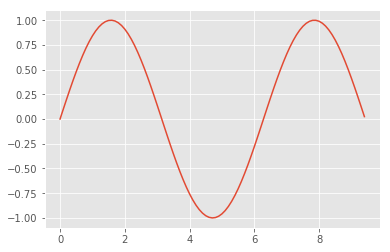

In [35]:
print(np.arange(0, 3 * np.pi, 0.1))
print (np.sin(x))
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)
plt.subplot()
# Plot the points using matplotlib
plt.plot(x, y)
plt.show()

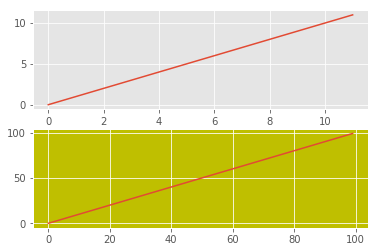

In [60]:
plt.subplot(211)
plt.plot(range(12))
plt.subplot(212, facecolor='y')
plt.plot(range(100))
plt.show()

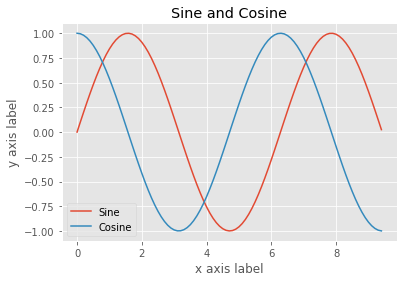

In [61]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

## Pandas

Tutoriales: [1](http://pandas.pydata.org/pandas-docs/version/0.18.1/tutorials.html), [2](https://dev.socrata.com/blog/2016/02/01/pandas-and-jupyter-notebook.html), [3](http://nikgrozev.com/2015/12/27/pandas-in-jupyter-quickstart-and-useful-snippets/)

Pandas permite gestionar conjuntos de datos n-dimensionales de diferentes formas, y también conectarlo con matplotlib para hacer gráficas.

Los conceptos principales de Pandas son los `Dataframe`s y las `Series`. La diferencia entre ambas es que la serie guarda sólo una serie (una columna o una fila, depende de como se quiera interpretar), mientras que un Dataframe guarda estructuras multidimensaionales agregando series.

Ambas tienen una "columna fantasma", que sirve de índice, y que se puede acceder con `d.index` (tanto si `d` es una serie o un dataframe). Si no se especifica un índice, se le añade uno virtual numerando las filas desde cero. Además, los índices pueden ser multidimensionales (por ejemplo, tener un índice por mes y dentro uno por dia de la semana).

In [62]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts

2000-01-01    0.668605
2000-01-02   -1.564066
2000-01-03   -0.386366
2000-01-04    0.114663
2000-01-05    0.017579
2000-01-06    0.141429
2000-01-07    1.973841
2000-01-08    0.214974
2000-01-09    0.943064
2000-01-10   -0.195466
2000-01-11   -3.438402
2000-01-12   -0.677733
2000-01-13    0.022190
2000-01-14   -1.312209
2000-01-15    0.253686
2000-01-16    0.396258
2000-01-17    1.026996
2000-01-18    0.904642
2000-01-19    1.550665
2000-01-20    0.746232
2000-01-21    1.518035
2000-01-22   -0.973730
2000-01-23    2.071919
2000-01-24   -0.997871
2000-01-25   -1.223324
2000-01-26    0.706635
2000-01-27    0.776375
2000-01-28    0.774552
2000-01-29   -0.770250
2000-01-30    0.220071
                ...   
2002-08-28   -0.085981
2002-08-29    0.912189
2002-08-30    0.079752
2002-08-31    0.826763
2002-09-01    0.432059
2002-09-02   -0.543989
2002-09-03    2.528489
2002-09-04   -0.302495
2002-09-05   -0.377592
2002-09-06   -1.195943
2002-09-07   -2.053593
2002-09-08    0.915927
2002-09-09 

In [65]:
ts.describe()

count    1000.000000
mean       -0.021272
std         1.008486
min        -3.438402
25%        -0.724818
50%         0.000764
75%         0.707225
max         3.230963
dtype: float64

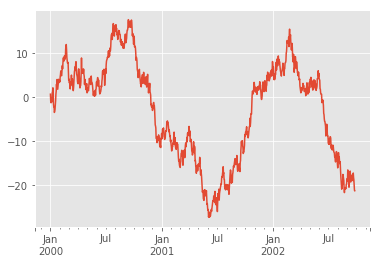

In [66]:
ts = ts.cumsum()
ts.plot();

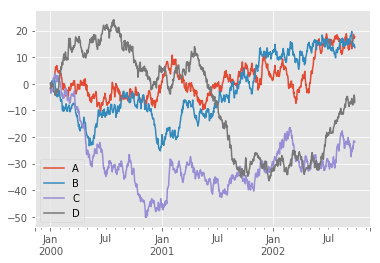

In [68]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))

df = df.cumsum()

df.plot();

Se puede hacer plot también de una columna contra otra.

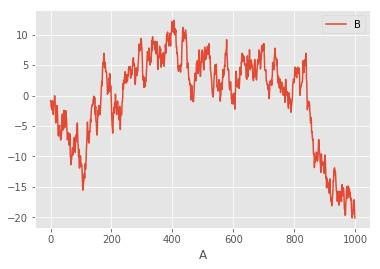

In [69]:
df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()
df3['A'] = pd.Series(list(range(len(df3))))
df3.plot(x='A', y='B');

Valores incompletos. Si no se establecen, se pone a `NaN` (_not a number_). 

In [70]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


`fillna()` permite cambiar el valor de los datos faltantes.

In [71]:
df.fillna(0)

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,0.0,4.0


In [72]:
pd.DataFrame(d, index=['d', 'b', 'a'])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [73]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


El primer ejemplo completo carga desde el fichero `swift-question-dates.txt.gz` las fechas de las preguntas en Stackoverflow que contienen el tag "swift".

In [74]:
!zcat swift-question-dates.txt.gz | head

2008-08-24
2008-11-19
2009-02-17
2009-03-30
2009-04-07
2009-04-21
2009-05-05
2009-05-27
2009-06-04
2009-06-10

gzip: stdout: Broken pipe


La función `read_csv` es capaz de leer cualquier fichero CSV y lo convierte en un "Dataframe", una estructura de tabla que guarda también los nombres y los tipos de las columnas, así como un índice por el que se identificarán las tablas. En este caso no se especifica ninguna columna como índice, por lo que se crea un índice automático numerado empezando desde 0. Se puede ver en la siguiente celda.

In [75]:
df = pd.read_csv('swift-question-dates.txt.gz',header=None,names=['date'],compression='gzip',parse_dates=['date'],index_col='date')

In [76]:
df

""
date
2008-08-24
2008-11-19
2009-02-17
2009-03-30
2009-04-07
2009-04-21
2009-05-05
2009-05-27
2009-06-04


De la fecha, extraer sólo la fecha (no la hora, que no nos interesa).

In [77]:
df.index = df.index.date

Añadimos una columna de todo "1" para especificar que cada pregunta cuenta como 1.

In [78]:
df['Count'] = 1
df

,Count
2008-08-24,1
2008-11-19,1
2009-02-17,1
2009-03-30,1
2009-04-07,1
2009-04-21,1
2009-05-05,1
2009-05-27,1
2009-06-04,1
2009-06-10,1


A los Dataframe de Pandas también se les puede aplicar operaciones de agregación, como `groupby` o `sum`. Finalmente, la funcion `plot()` permite mostrar los datos en un gráfico.

In [79]:
accum = df.groupby(df.index).sum()
accum

,Count
2008-08-24,1
2008-11-19,1
2009-02-17,1
2009-03-30,1
2009-04-07,1
2009-04-21,1
2009-05-05,1
2009-05-27,1
2009-06-04,1
2009-06-10,2


In [80]:
# Los 30 primeros registros que tengan un número de preguntas mayor que 20 por día.
accum = accum[accum.Count > 20][:30]
accum

,Count
2014-06-02,33
2014-06-03,170
2014-06-04,188
2014-06-05,160
2014-06-06,139
2014-06-07,84
2014-06-08,148
2014-06-09,123
2014-06-10,140
2014-06-11,103


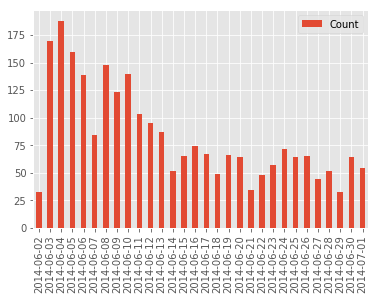

In [81]:
accum[accum.Count > 30][:30].plot.bar()

In [82]:
!pip install lxml

    100% |████████████████████████████████| 5.8MB 114kB/s ta 0:00:011  2% |█                               | 163kB 826kB/s eta 0:00:07    9% |███▏                            | 583kB 843kB/s eta 0:00:07    64% |████████████████████▌           | 3.7MB 872kB/s eta 0:00:03    95% |██████████████████████████████▌ | 5.6MB 1.0MB/s eta 0:00:01    98% |███████████████████████████████▋| 5.8MB 1.3MB/s eta 0:00:01
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [83]:
dfwiki = pd.read_html('https://en.wikipedia.org/wiki/Swift_(programming_language)',attrs={'class': 'infobox vevent'})

In [84]:
dfwiki[0]

,0,1
0,NaN,NaN
1,Paradigm,"Multi-paradigm: protocol-oriented, object-orie..."
2,Designed by,Chris Lattner and Apple Inc.
3,Developer,Apple Inc.
4,First appeared,"June 2, 2014; 4 years ago[1]"
5,NaN,NaN
6,Stable release,"4.2[2] / September 17, 2018; 23 days ago"
7,Preview release,4.2.0[3]
8,Typing discipline,"Static, strong, inferred"
9,OS,"Darwin, Linux, FreeBSD, z/OS"


In [85]:
firstdate = dfwiki[0][1][4]
firstdate

'June\xa02, 2014; 4 years ago[1]'

In [86]:
from dateutil.parser import parse
dt = parse(firstdate.split(';')[0])
assert dt.date().isoformat() == accum.index[0].isoformat()

In [87]:
# cargar municipios y mostrarlos en el mapa
df = pd.read_csv('municipios-españa-2017.csv.gz',header=0,compression='gzip')

In [88]:
df.head()

,COD_INE,ID_REL,COD_GEO,COD_PROV,PROVINCIA,NOMBRE_ACTUAL,POBLACION_MUNI,SUPERFICIE,PERIMETRO,COD_INE_CAPITAL,CAPITAL,POBLACION_CAPITAL,HOJA_MTN25_ETRS89,LONGITUD_ETRS89,LATITUD_ETRS89,ORIGENCOOR,ALTITUD,ORIGENALTITUD
0,1001000000,1010014,1010,1,Araba/Álava,Alegría-Dulantzi,2856,1.994587e+03,35069,1001000101,Alegría-Dulantzi,2747,0113-3,-2.712437,42.939812,Mapa,600.0,MDT5
1,1002000000,1010029,1020,1,Araba/Álava,Amurrio,10260,9.635289e+06,65134,1002000201,Amurrio,9124,0086-4,-3.000073,43.054278,Mapa,219.0,MDT5
2,1003000000,1010035,1030,1,Araba/Álava,Aramaio,1502,7.327403e+03,41818,1003000601,Ibarra,803,0087-4,-2.565400,43.051197,Mapa,333.0,MDT5
3,1004000000,1010040,1040,1,Araba/Álava,Artziniega,1840,2.728730e+03,22886,1004000101,Artziniega,1704,0086-1,-3.127917,43.120844,Mapa,210.0,MDT5
4,1006000000,1010066,1060,1,Araba/Álava,Armiñón,234,1.294433e+03,24606,1006000101,Armiñón,111,0137-4,-2.871835,42.723262,Mapa,467.0,MDT5


In [89]:
df.iloc[0]

COD_INE                    1001000000
ID_REL                        1010014
COD_GEO                          1010
COD_PROV                            1
PROVINCIA                 Araba/Álava
NOMBRE_ACTUAL        Alegría-Dulantzi
POBLACION_MUNI                   2856
SUPERFICIE                    1994.59
PERIMETRO                       35069
COD_INE_CAPITAL            1001000101
CAPITAL              Alegría-Dulantzi
POBLACION_CAPITAL                2747
HOJA_MTN25_ETRS89              0113-3
LONGITUD_ETRS89              -2.71244
LATITUD_ETRS89                42.9398
ORIGENCOOR                       Mapa
ALTITUD                           600
ORIGENALTITUD                    MDT5
Name: 0, dtype: object

In [90]:
df.iloc[0].NOMBRE_ACTUAL

'Alegría-Dulantzi'

In [91]:
df.loc[:,'NOMBRE_ACTUAL']

0                   Alegría-Dulantzi
1                            Amurrio
2                            Aramaio
3                         Artziniega
4                            Armiñón
5                Arratzua-Ubarrundia
6                          Asparrena
7                        Ayala/Aiara
8              Baños de Ebro/Mañueta
9                          Barrundia
10                      Berantevilla
11                           Bernedo
12                   Campezo/Kanpezu
13                          Zigoitia
14                            Kripan
15                         Kuartango
16                   Elburgo/Burgelu
17                           Elciego
18                    Elvillar/Bilar
19                     Iruraiz-Gauna
20                 Labastida/Bastida
21                            Lagrán
22                         Laguardia
23                Lanciego/Lantziego
24               Lapuebla de Labarca
25                              Leza
26                     Laudio/Llodio
2

In [92]:
df.iloc[:,0]

0        1001000000
1        1002000000
2        1003000000
3        1004000000
4        1006000000
5        1008000000
6        1009000000
7        1010000000
8        1011000000
9        1013000000
10       1014000000
11       1016000000
12       1017000000
13       1018000000
14       1019000000
15       1020000000
16       1021000000
17       1022000000
18       1023000000
19       1027000000
20       1028000000
21       1030000000
22       1031000000
23       1032000000
24       1033000000
25       1034000000
26       1036000000
27       1037000000
28       1039000000
29       1041000000
           ...     
8094    50274000000
8095    50275000000
8096    50276000000
8097    50277000000
8098    50278000000
8099    50279000000
8100    50280000000
8101    50281000000
8102    50282000000
8103    50283000000
8104    50284000000
8105    50285000000
8106    50286000000
8107    50287000000
8108    50288000000
8109    50289000000
8110    50290000000
8111    50291000000
8112    50292000000


In [95]:
df.PROVINCIA

0       Araba/Álava
1       Araba/Álava
2       Araba/Álava
3       Araba/Álava
4       Araba/Álava
5       Araba/Álava
6       Araba/Álava
7       Araba/Álava
8       Araba/Álava
9       Araba/Álava
10      Araba/Álava
11      Araba/Álava
12      Araba/Álava
13      Araba/Álava
14      Araba/Álava
15      Araba/Álava
16      Araba/Álava
17      Araba/Álava
18      Araba/Álava
19      Araba/Álava
20      Araba/Álava
21      Araba/Álava
22      Araba/Álava
23      Araba/Álava
24      Araba/Álava
25      Araba/Álava
26      Araba/Álava
27      Araba/Álava
28      Araba/Álava
29      Araba/Álava
           ...     
8094       Zaragoza
8095       Zaragoza
8096       Zaragoza
8097       Zaragoza
8098       Zaragoza
8099       Zaragoza
8100       Zaragoza
8101       Zaragoza
8102       Zaragoza
8103       Zaragoza
8104       Zaragoza
8105       Zaragoza
8106       Zaragoza
8107       Zaragoza
8108       Zaragoza
8109       Zaragoza
8110       Zaragoza
8111       Zaragoza
8112       Zaragoza


In [111]:
cor = df[df.PROVINCIA == 'A Coruña']
cor

,COD_INE,ID_REL,COD_GEO,COD_PROV,PROVINCIA,NOMBRE_ACTUAL,POBLACION_MUNI,SUPERFICIE,PERIMETRO,COD_INE_CAPITAL,CAPITAL,POBLACION_CAPITAL,HOJA_MTN25_ETRS89,LONGITUD_ETRS89,LATITUD_ETRS89,ORIGENCOOR,ALTITUD,ORIGENALTITUD
2123,15001000000,1150011,15010,15,A Coruña,Abegondo,5533,8.389634e+03,59995,15001011501,San Marco,185,0045-4,-8.288772,43.227281,GPS. PNRGM,144.0,GPS. PNRGM
2124,15002000000,1150026,15020,15,A Coruña,Ames,30544,8.004346e+03,71365,15002080101,Bertamiráns,8309,0094-4,-8.650329,42.859455,GPS. PNRGM,33.0,GPS. PNRGM
2125,15003000000,1150032,15030,15,A Coruña,Aranga,1982,1.195902e+07,60971,15003012301,Ponte Aranga,8,0046-4,-8.016029,43.234040,GPS. PNRGM,269.0,GPS. PNRGM
2126,15004000000,1150047,15040,15,A Coruña,Ares,5672,1.830962e+03,35274,15004010101,Ares,3855,0021-2,-8.243660,43.426559,GPS. PNRGM,7.0,GPS. PNRGM
2127,15005000000,1150050,15050,15,A Coruña,Arteixo,31239,9.367961e+06,59897,15005020101,A Baiuca,12021,0045-1,-8.505070,43.304745,GPS. PNRGM,31.0,GPS. PNRGM
2128,15006000000,1150063,15060,15,A Coruña,Arzúa,6211,1.554770e+04,77864,15006020101,Arzúa,2803,0096-1,-8.164047,42.926926,GPS. PNRGM,385.0,GPS. PNRGM
2129,15007000000,1150079,15070,15,A Coruña,A Baña,3645,9.818950e+03,53224,15007011001,San Vicenzo,280,0094-1,-8.758003,42.961898,GPS. PNRGM,272.0,GPS. PNRGM
2130,15008000000,1150085,15080,15,A Coruña,Bergondo,6656,3.272044e+03,26881,15008020401,Carrio,193,0045-2,-8.234270,43.319641,GPS. PNRGM,103.0,GPS. PNRGM
2131,15009000000,1150098,15090,15,A Coruña,Betanzos,12966,2.421119e+03,32226,15009000101,Betanzos,10210,0045-2,-8.210832,43.279114,GPS. PNRGM,24.0,GPS. PNRGM
2132,15010000000,1150102,15100,15,A Coruña,Boimorto,2111,8.234124e+03,56540,15010051801,A Gándara,401,0096-1,-8.126834,43.007396,GPS. PNRGM,488.0,GPS. PNRGM


In [97]:
mula = df[df.NOMBRE_ACTUAL == 'Mula'].iloc[0]
mula

COD_INE              30029000000
ID_REL                   1300294
COD_GEO                    30290
COD_PROV                      30
PROVINCIA                 Murcia
NOMBRE_ACTUAL               Mula
POBLACION_MUNI             16689
SUPERFICIE               63405.9
PERIMETRO                 150394
COD_INE_CAPITAL      30029000901
CAPITAL                     Mula
POBLACION_CAPITAL          14380
HOJA_MTN25_ETRS89         0912-3
LONGITUD_ETRS89         -1.49033
LATITUD_ETRS89            38.042
ORIGENCOOR                  Mapa
ALTITUD                      318
ORIGENALTITUD               MDT5
Name: 4594, dtype: object

In [98]:
(mula_lat,mula_lon) = (mula.LATITUD_ETRS89, mula.LONGITUD_ETRS89)
(mula_lat,mula_lon)

(38.04203339, -1.4903281100000001)

El paquete `folium` permite generar mapas de posiciones. El siguiente ejemplo centra un mapa en Madrid y pone un marcador con su nombre:

In [99]:
!pip install folium

    100% |████████████████████████████████| 81kB 487kB/s ta 0:00:01
You are using pip version 9.0.3, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [137]:
import folium

map = folium.Map(location=[mula_lat, mula_lon],zoom_start=10)
folium.Marker(location = [mula_lat, mula_lon], popup=mula.NOMBRE_ACTUAL).add_to(map)

map

## Ejercicio

Mostrar con `folium` marcadores para cada pueblo de A Coruña y Murcia. Se pueden usar las funciones `itertuples()` o `iterrows()` de un `Dataframe` para recorrer los elementos del mismo.

In [141]:
scq = df[df.NOMBRE_ACTUAL == 'Santiago de Compostela'].iloc[0]
map = folium.Map(location=[scq.LATITUD_ETRS89, scq.LONGITUD_ETRS89],zoom_start=8)

cor = df[df.PROVINCIA == 'A Coruña']

for row_index,row in cor.iterrows():
    folium.Marker([row['LATITUD_ETRS89'], row['LONGITUD_ETRS89']], popup=row['NOMBRE_ACTUAL']).add_to(map)
map